In [2]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Input, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

import tensorflow_hub as hub 

In [1]:
# Getting names of the classes we have
data_directory = pathlib.Path('D:\VISI KOMPUTER\pizza_not_pizza')
class_names = [item.name for item in data_directory.glob('*')][:3]
print(class_names)

NameError: name 'pathlib' is not defined

In [4]:
pizza_dir = 'D:\VISI KOMPUTER\pizza_not_pizza\pizza' 
not_pizza_dir = 'D:\VISI KOMPUTER\pizza_not_pizza\\not_pizza'
data_dir = 'D:\VISI KOMPUTER\pizza_not_pizza'

In [5]:
num_pizza_images = len(os.listdir(pizza_dir))
non_pizza_images = len(os.listdir(not_pizza_dir))
print(f'Number of Pizza images: {num_pizza_images}')
print(f'Number of Non-Pizza images: {non_pizza_images}')

Number of Pizza images: 983
Number of Non-Pizza images: 983


In [6]:
# Defining data generator withour Data Augmentation
data_gen = ImageDataGenerator(rescale = 1/255., validation_split = 0.2)

train_data = data_gen.flow_from_directory(data_dir, 
                                          target_size = (224, 224), 
                                          batch_size = 32,
                                          subset = 'training',
                                          class_mode = 'binary')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [7]:
images, labels = train_data.next()
len(images), len(labels), images[0].shape

(32, 32, (224, 224, 3))

In [8]:
def plot_random_images():
    """
    Plots 20 Random Images from the dataset
    """
    
    images, labels = train_data.next()
    labels = labels.astype('int32')
    i = 1

    plt.figure(figsize = (10, 5))
    
    for image, label in zip(images, labels):
        plt.subplot(4, 5, i)
        plt.imshow(image)
        plt.title(class_names[label])
        plt.axis('off')
        i += 1
        if i == 21:
            break

    plt.tight_layout()       
    plt.show()

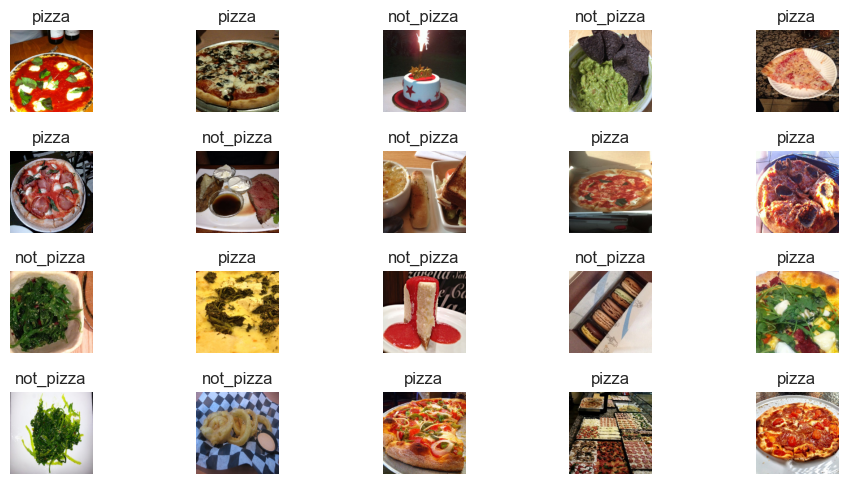

In [9]:
plot_random_images()

In [10]:
tf.random.set_seed(42)
model_1 = Sequential([
    Input(shape = (224, 224, 3)), # Input layer    
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # First Convolutional layer
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), # Second Convolutional layer
    Flatten(),
    Dense(1, activation = 'sigmoid') # Output layer  
])

model_1.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 401s 7s/step - loss: 3.2624 - accuracy: 0.5527 - val_loss: 0.6799 - val_accuracy: 0.5944
Epoch 2/5
50/50 [==============================] - 325s 6s/step - loss: 0.6318 - accuracy: 0.6823 - val_loss: 0.6379 - val_accuracy: 0.6760
Epoch 3/5
50/50 [==============================] - 252s 5s/step - loss: 0.4575 - accuracy: 0.8291 - val_loss: 0.6602 - val_accuracy: 0.6403
Epoch 4/5
32/50 [==================>...........] - ETA: 1:26 - loss: 0.2377 - accuracy: 0.9359

: 

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
    """
    Plots the curves of both loss and accuracy
    """

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(loss))

    fig, ax = plt.subplots(1, 2, figsize = (20, 5))

    # Plotting loss
    ax1 = sns.lineplot(x = epochs, y = loss, label='Training Loss', ax= ax[0])
    ax1 = sns.lineplot(x = epochs, y = val_loss, label='Validation Loss', ax= ax[0])
    ax1.set(title = 'Loss', xlabel = 'Epochs')

    # Plot accuracy
    ax2 = sns.lineplot(x = epochs, y = accuracy, label='Training Accuracy', ax= ax[1])
    ax2 = sns.lineplot(x = epochs, y = val_accuracy, label='Validation Accuracy', ax=ax[1])
    ax2.set(title = 'Accuracy', xlabel = 'Epochs')

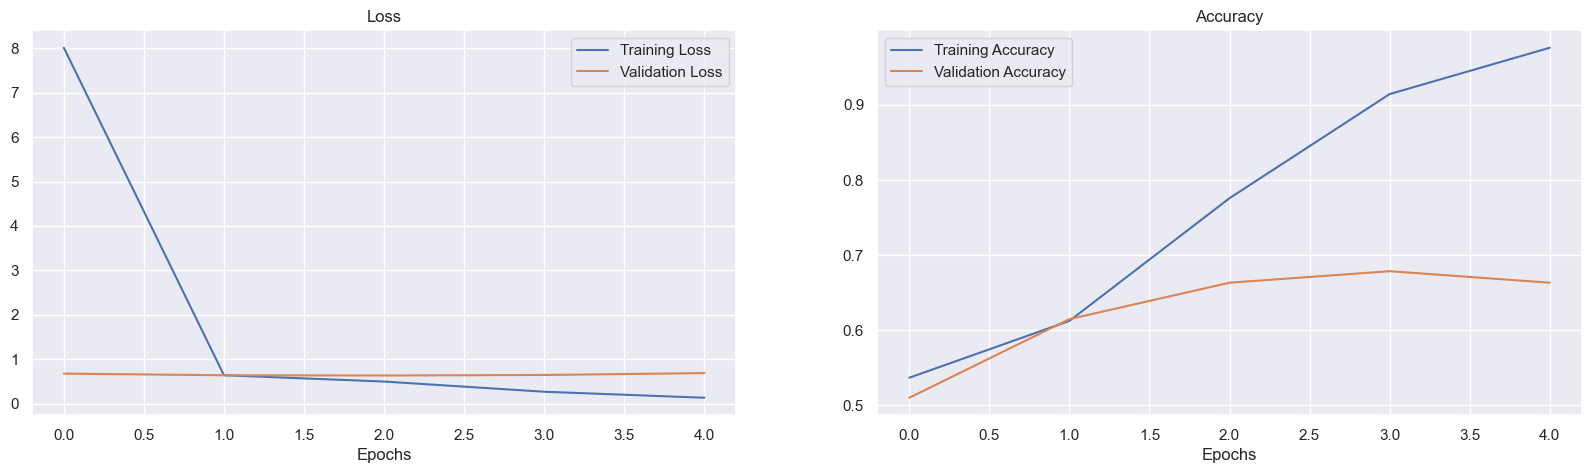

In [ ]:
plot_loss_curves(history_1)

In [ ]:
model_2 = Sequential([
    Input(shape = (224, 224, 3)),   
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'), 
    MaxPool2D(pool_size = 2), # It will reduce the number of features by half
    Conv2D(filters = 32, kernel_size =2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')  
])

model_2.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 5,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 132s 3s/step - loss: 0.7102 - accuracy: 0.6169 - val_loss: 0.5904 - val_accuracy: 0.7245
Epoch 2/5
50/50 [==============================] - 135s 3s/step - loss: 0.5812 - accuracy: 0.7027 - val_loss: 0.5876 - val_accuracy: 0.6990
Epoch 3/5
50/50 [==============================] - 132s 3s/step - loss: 0.5217 - accuracy: 0.7611 - val_loss: 0.5680 - val_accuracy: 0.7347
Epoch 4/5
50/50 [==============================] - 134s 3s/step - loss: 0.4561 - accuracy: 0.8100 - val_loss: 0.5213 - val_accuracy: 0.7526
Epoch 5/5
50/50 [==============================] - 135s 3s/step - loss: 0.3790 - accuracy: 0.8437 - val_loss: 0.5343 - val_accuracy: 0.7398


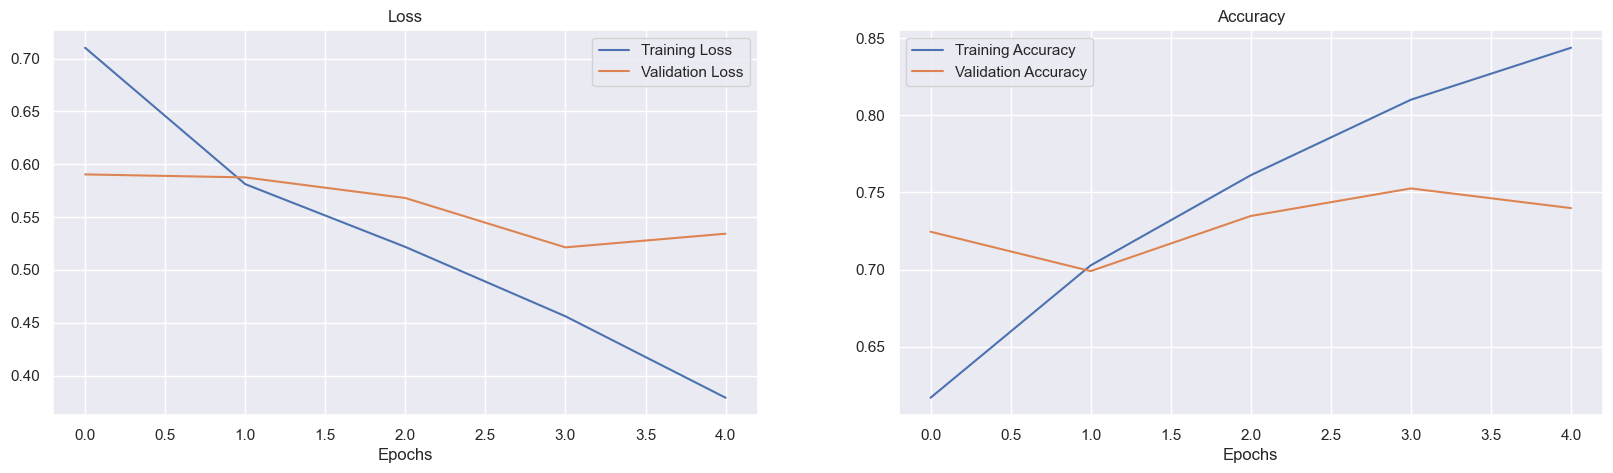

In [ ]:
plot_loss_curves(history_2)

In [ ]:
# Defining data generator with Data Augmentation
data_gen_augmented = ImageDataGenerator(rescale = 1/255., 
                                        validation_split = 0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip= True,
                                        rotation_range = 20,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)

print('Augmented training Images:')
train_data_augmented = data_gen_augmented.flow_from_directory(data_dir, 
                                                              target_size = (224, 224), 
                                                              batch_size = 32,
                                                              subset = 'training',
                                                              class_mode = 'binary')

print('Unchanged Validation Images:')
val_data = data_gen.flow_from_directory(data_dir, 
                                        target_size = (224, 224), 
                                        batch_size = 32,
                                        subset = 'validation',
                                        class_mode = 'binary')

Augmented training Images:
Found 1574 images belonging to 2 classes.
Unchanged Validation Images:
Found 392 images belonging to 2 classes.


In [ ]:
model_3 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_3.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data_augmented, # changing the training data
                        epochs= 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = val_data,
                        validation_steps = len(val_data))

Epoch 1/5
50/50 [==============================] - 162s 3s/step - loss: 0.6749 - accuracy: 0.5972 - val_loss: 0.5909 - val_accuracy: 0.7143
Epoch 2/5
50/50 [==============================] - 149s 3s/step - loss: 0.6113 - accuracy: 0.6607 - val_loss: 0.6640 - val_accuracy: 0.6173
Epoch 3/5
50/50 [==============================] - 149s 3s/step - loss: 0.5995 - accuracy: 0.6773 - val_loss: 0.5961 - val_accuracy: 0.6811
Epoch 4/5
50/50 [==============================] - 146s 3s/step - loss: 0.5858 - accuracy: 0.6836 - val_loss: 0.5507 - val_accuracy: 0.7372
Epoch 5/5
50/50 [==============================] - 151s 3s/step - loss: 0.5825 - accuracy: 0.7027 - val_loss: 0.5486 - val_accuracy: 0.7372


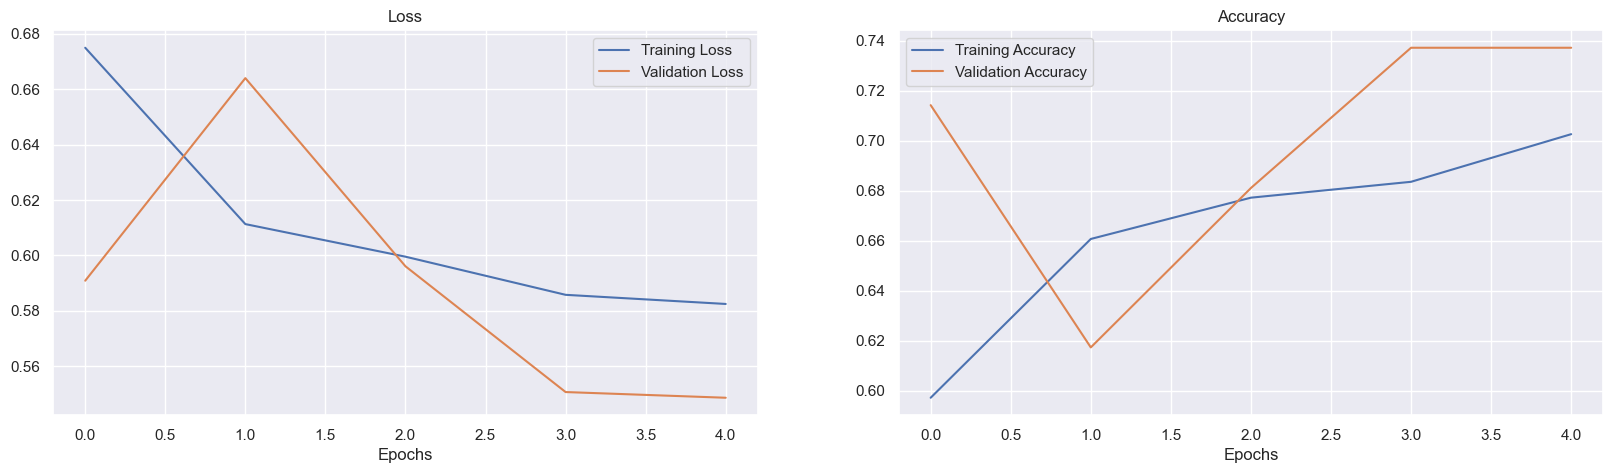

In [ ]:
plot_loss_curves(history_3)

In [ ]:
model_4 = Sequential([
    Input(shape = (224, 224, 3)),
    Conv2D(filters = 10, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 32, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(filters = 64, kernel_size = 2, padding = 'valid', activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

model_4.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(learning_rate = 0.0001),
                metrics = ['accuracy'])

history_4 = model_4.fit(train_data, # Using non-augmented data
                        epochs= 20,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

NameError: name 'Sequential' is not defined

In [ ]:
plot_loss_curves(history_4)

In [ ]:
# EfficientNetB7 feature vector
url = 'https://tfhub.dev/google/efficientnet/b7/feature-vector/1'

feature_extractor_layer = hub.KerasLayer(url,
                                         trainable=False,
                                         input_shape=(224, 224, 3))

model_5 = Sequential([
    feature_extractor_layer,
    Dense(1, activation = 'sigmoid')
])

model_5.compile(loss = BinaryCrossentropy(),
                optimizer = Adam(),
                metrics = ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 10,
                        steps_per_epoch = len(train_data),
                        validation_data = val_data,
                        validation_steps = len(val_data))

In [ ]:
plot_loss_curves(history_5)